## Neural Nets Implementation & XOR Problem

**Goal:** The goal of this exercise is to implement a small neural network from scratch and train it using backprop.

In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [11]:
# Load xor toy dataset
with open('xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train'] # 800 training data points with 2 features
y_train = data['y_train'] # training binary labels {0,1}

X_test = data['X_test']
y_test = data['y_test']

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


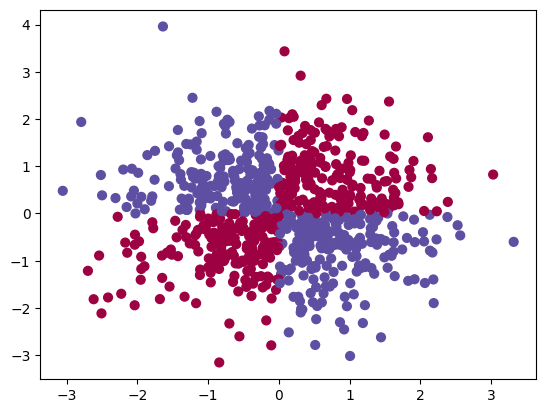

In [13]:
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)

**In this exercise, do the following:**
1. Implement brackprop to train a two-layer perceptron: an input layer, a hidden layer, and an output layer.
2. The core of the code should include: a forward pass, a backward pass, and weight updates.
3. For input and output layers specify the number of nodes appropriate for the above problem.
4. Randomly initialize the weights and biases of the network.
5. For the hidden layer use ReLU as an activation function and for the output layer use logistic sigmoid.
6. Use cross-entropy loss as the network's loss function and mini-batch SGD as the optimizer.
7. Use cross-validation to estimate performance.
8. Tune the network as you see fit (including number of units in the hidden layer, learning rate,  batch size, number of epochs, etc).
9. Provide a classification report of the performance on the train and test set.
10. Write a summary. Make sure you document your code well.
  
(Optional) You can use sklearn.inspection.DecisionBoundaryDisplay to visualize your decision boundary.

Epoch 0, Training Loss: 1.5941
Epoch 100, Training Loss: 0.3321
Epoch 200, Training Loss: 0.2454
Epoch 300, Training Loss: 0.2065
Epoch 400, Training Loss: 0.1821
Epoch 500, Training Loss: 0.1647
Epoch 600, Training Loss: 0.1515
Epoch 700, Training Loss: 0.1411
Epoch 800, Training Loss: 0.1325
Epoch 900, Training Loss: 0.1255
Epoch 999, Training Loss: 0.1195

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       387
           1       0.94      0.98      0.96       413

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800


Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        97
           1       0.95      0.99      0.97       103

    accuracy                           0.97       200
   macro avg       0.97      0.97  

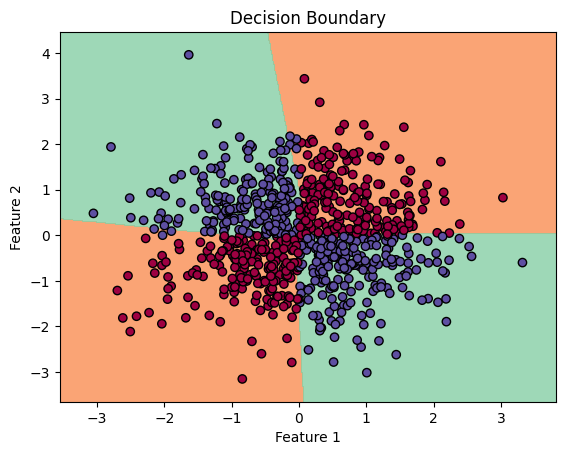

In [15]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

input_dim = 2
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
epochs = 1000
batch_size = 32

np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Cross-entropy loss
def cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def forward(X):
    z1 = X @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

for epoch in range(epochs):
    X_train, y_train = shuffle(X_train, y_train)

    for i in range(0, len(y_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size].reshape(-1, 1)

        # Forward pass
        z1, a1, z2, a2 = forward(X_batch)

        # Backward pass
        dz2 = a2 - y_batch
        dW2 = a1.T @ dz2 / len(y_batch)
        db2 = np.sum(dz2, axis=0, keepdims=True) / len(y_batch)
        dz1 = (dz2 @ W2.T) * (z1 > 0)
        dW1 = X_batch.T @ dz1 / len(y_batch)
        db1 = np.sum(dz1, axis=0, keepdims=True) / len(y_batch)

        # Parameter update
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    if epoch % 100 == 0 or epoch == epochs - 1:
        _, _, _, train_preds = forward(X_train)
        train_loss = cross_entropy(y_train.reshape(-1, 1), train_preds)
        print(f"Epoch {epoch}, Training Loss: {train_loss:.4f}")

_, _, _, train_preds = forward(X_train)
train_preds = (train_preds > 0.5).astype(int)
_, _, _, test_preds = forward(X_test)
test_preds = (test_preds > 0.5).astype(int)

print("\nTrain Classification Report:")
print(classification_report(y_train, train_preds))

print("\nTest Classification Report:")
print(classification_report(y_test, test_preds))

x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = forward(np.c_[xx.ravel(), yy.ravel()])[-1]
Z = (Z > 0.5).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral, alpha = 0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.Spectral, edgecolors = 'k')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Summary
This NN script uses two-layers. It uses: ReLU activation for the hidden layer, sigmoid activation for the output layer, cross-entropy loss to evaluate performance. The model is trained with mini-batch gradient descent for 1000 epochs. After training, it evaluates classification accuracy using classification_report. The code then visualizes the decision boundary by plotting predictions over a grid.